In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
# load and clean the data
df = pd.read_csv('ndwi.csv', parse_dates=['system:time_start'], index_col='system:time_start')

def clean_num(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace('£', '').replace('%', '').replace(',', ''))
    return(x)

df['nd'] = df['nd'].apply(clean_num).astype(float)

In [160]:
# resample to two month intervals
resampled = df.resample("2M").median()

In [161]:
# pivot by year to stack data year over year
resampled.index = resampled.index.rename('Year')
pv = pd.pivot_table(resampled, index=resampled.index.month, columns=resampled.index.year, values='nd', aggfunc='sum')
pv = pv.rename_axis('Month')

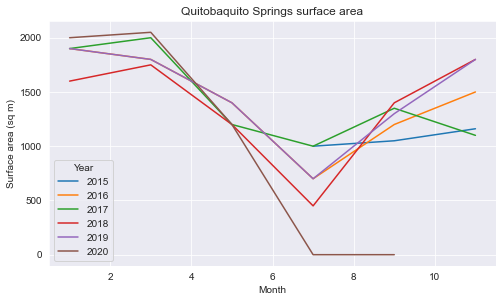

In [162]:
# plot Quitobaquito surface area
sns.set_style('darkgrid')
(pv*25).plot()
plt.title('Quitobaquito Springs surface area')
plt.ylabel('Surface area (sq m)')
plt.gcf().set_size_inches(8, 4.5)
plt.savefig('quitobaquito.png', dpi=150)

In [171]:
# load drought data
drought = pd.read_csv('drought-data.csv', parse_dates=['system:time_start'],
                      index_col='system:time_start')
resampled_drought = drought.resample("2M").median()

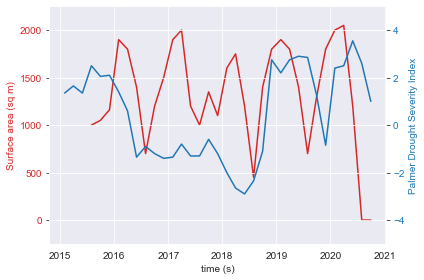

In [172]:
sns.set_style('darkgrid')

# plot two graphs on the same axes
fig, ax1 = plt.subplots()

# plot Quitobaquito surface area in red
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Surface area (sq m)', color=color)
ax1.plot(resampled*25, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([-250, 2250])

# create a second 'axes' object on the same graph x-axis
ax2 = ax1.twinx() 

# plot PDSI in blue
color = 'tab:blue'
ax2.set_ylabel('Palmer Drought Severity Index', color=color)
ax2.plot(resampled_drought, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([-5, 5])
fig.tight_layout()

# save output
plt.savefig('quitobaquito-pdsi.png', dpi=150)

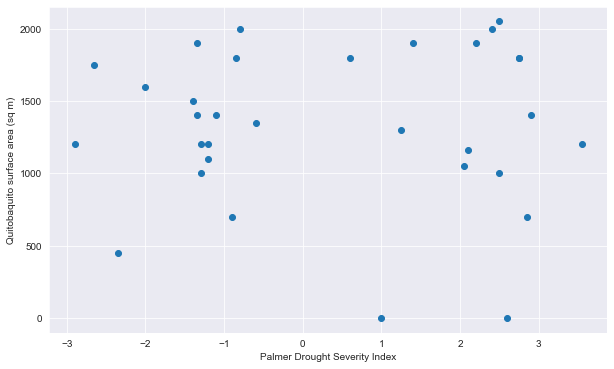

In [176]:
plt.figure(figsize=(10,6))
plt.scatter(list(resampled_drought['pdsi'])[3:], list(resampled['nd']*25))
plt.ylabel('Quitobaquito surface area (sq m)')
plt.xlabel('Palmer Drought Severity Index')
plt.show()